<a href="https://colab.research.google.com/github/KNZAscalon/KNZAscalon/blob/main/BTC_MSTR_Correlation_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install tfcausalimpact

In [ ]:
import yfinance as yf
import pandas as pd
from causalimpact import CausalImpact

In [ ]:
#Define Dates
Training_Start ="2020-12-01"
Training_End="2021-02-05"
Treatment_Start="2021-02-08"
Treatment_End="2021-12-09"
end_stock="2021-12-10"

In [ ]:
#Bitcoin Data
y=["BTC-USD"]
y=yf.download(y,start=Training_Start,
              end=end_stock,
              interval="1d")
y=y['Adj Close'].rename("BTC")
y

[*********************100%%**********************]  1 of 1 completed


Date
2020-12-01    18802.998047
2020-12-02    19201.091797
2020-12-03    19445.398438
2020-12-04    18699.765625
2020-12-05    19154.230469
                  ...     
2021-12-05    49368.847656
2021-12-06    50582.625000
2021-12-07    50700.085938
2021-12-08    50504.796875
2021-12-09    47672.121094
Name: BTC, Length: 374, dtype: float64

In [ ]:
#Stocks
stocks=["MSTR"]
x=yf.download(stocks,start=Training_Start,
              end=end_stock,
              interval="1d")
x=x['Adj Close'].rename("MSTR")
x.head()

[*********************100%%**********************]  1 of 1 completed


Date
2020-12-01    324.000000
2020-12-02    321.320007
2020-12-03    331.600006
2020-12-04    328.000000
2020-12-07    336.220001
Name: MSTR, dtype: float64

In [ ]:
dataset =pd.concat([y,x],axis=1).dropna()
dataset.head()

,BTC,MSTR
Date,,
2020-12-01,18802.998047,324.000000
2020-12-02,19201.091797,321.320007
2020-12-03,19445.398438,331.600006
2020-12-04,18699.765625,328.000000
2020-12-07,19191.630859,336.220001


In [ ]:
dataset_correlation = dataset[dataset.index <= Training_End]
dataset_correlation.tail()

,BTC,MSTR
Date,,
2021-02-01,33537.175781,634.559998
2021-02-02,35510.289062,687.919983
2021-02-03,37472.089844,741.190002
2021-02-04,36926.066406,765.590027
2021-02-05,38144.308594,806.000000


In [ ]:
#Correlation
dataset_correlation.pct_change().dropna().corr()

,BTC,MSTR
BTC,1.000000,0.646417
MSTR,0.646417,1.000000


from matplotlib import pyplot as plt
_df_12['BTC'].plot(kind='hist', bins=20, title='BTC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['MSTR'].plot(kind='hist', bins=20, title='MSTR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14.plot(kind='scatter', x='BTC', y='MSTR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MSTR']
  ys = series['BTC']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('MSTR', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MSTR')
_ = plt.ylabel('BTC')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['MSTR']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'MSTR'}, axis=1)
              .sort_values('MSTR', ascending=True))
  xs = counted['MSTR']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_16.sort_values('MSTR', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MSTR')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_17['BTC'].plot(kind='line', figsize=(8, 4), title='BTC')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['MSTR'].plot(kind='line', figsize=(8, 4), title='MSTR')
plt.gca().spines[['top', 'right']].set_visible(False)

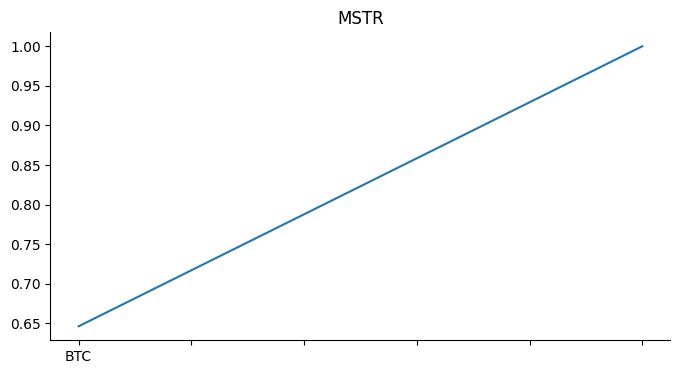

In [ ]:
from matplotlib import pyplot as plt
_df_18['MSTR'].plot(kind='line', figsize=(8, 4), title='MSTR')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
dataset = dataset[['BTC','MSTR']]

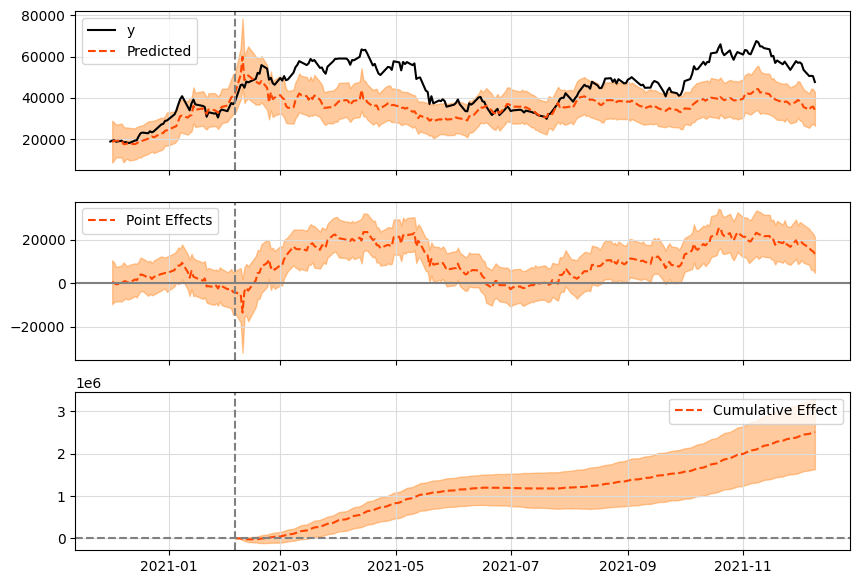

In [ ]:
try:
    # Define Pre and Post Period
    pre_period = [Training_Start, Training_End]
    post_period = [Treatment_Start, Treatment_End]

    # Impact
    impact = CausalImpact(data=dataset, pre_period=pre_period, post_period=post_period)

    # Check if inferences object is not None
    if impact.inferences is not None:
        impact.plot()
    else:
        print("Error: Inferences object is None. Please check your data and parameters.")
except Exception as e:
    print("An error occurred:", e)

In [ ]:
#Summary
print (impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    48879.11           10313491.0
Prediction (s.d.)         34851.63 (1840.93) 7353694.0 (388436.5)
95% CI                    [31595.48, 38811.8][6666646.55, 8189289.96]

Absolute effect (s.d.)    14027.48 (1840.93) 2959797.0 (388436.5)
95% CI                    [10067.31, 17283.62][2124201.04, 3646844.45]

Relative effect (s.d.)    40.25% (5.28%)     40.25% (5.28%)
95% CI                    [28.89%, 49.59%]   [28.89%, 49.59%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [ ]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 48879.11. By contrast, in the absence of an
intervention, we would have expected an average response of 34851.63.
The 95% interval of this counterfactual prediction is [31595.48, 38811.8].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 14027.48 with a 95% interval of
[10067.31, 17283.62]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 10313491.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 7353694.0. The 95% interval of this prediction is [6666646.55, 8189289.96].


The above results are given in terms of absolute numbers. In 